In [1]:
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def Geometric_Slerp(P0,P1,r,cant_puntos):

    omega = math.acos((P0[0]*P1[0]+P0[1]*P1[1]+P0[2]*P1[2])/(r*r)) #La fórmula falla cuando los puntos son los extremos de un diametro

    x_geo = [P0[0]*np.sin(omega*(1-t))/np.sin(omega)+P1[0]*np.sin(omega*t)/np.sin(omega) for t in np.linspace(0.0, 1.0, num=cant_puntos)]

    y_geo = [P0[1]*np.sin(omega*(1-t))/np.sin(omega)+P1[1]*np.sin(omega*t)/np.sin(omega) for t in np.linspace(0.0, 1.0, num=cant_puntos)]

    z_geo = [P0[2]*np.sin(omega*(1-t))/np.sin(omega)+P1[2]*np.sin(omega*t)/np.sin(omega) for t in np.linspace(0.0, 1.0, num=cant_puntos)]

    return x_geo,y_geo,z_geo

In [3]:
def cross(a, b):
    c = [a[1]*b[2] - a[2]*b[1],
         a[2]*b[0] - a[0]*b[2],
         a[0]*b[1] - a[1]*b[0]]

    return c

In [4]:
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

In [5]:
from scipy.optimize import fsolve
import math

def equations(p):
    x, y, z = p

    return (In_rot[0]*x + In_rot[1]*y + In_rot[2]*z - np.cos(theta_cap),\
            normal_vector[0]*x + normal_vector[1]*y + normal_vector[2]*z,\
           x*x+y*y+z*z-1)

In [6]:

def color_triangle(x, y, z, V0, V1, V2):
    
    Centroid = [V0[0]+V1[0]+V2[0],V0[1]+V1[1]+V2[1],V0[2]+V1[2]+V2[2]]
   
    x_cons_0 = V0[1]*V1[2] - V0[2]*V1[1]
    y_cons_0 = V0[2]*V1[0] - V0[0]*V1[2]
    z_cons_0 = V0[0]*V1[1] - V0[1]*V1[0]
    
    if Centroid[0]*x_cons_0+Centroid[1]*y_cons_0+Centroid[2]*z_cons_0<0:
        x_cons_0 = -x_cons_0
        y_cons_0 = -y_cons_0
        z_cons_0 = -z_cons_0
    
    x_cons_1 = V2[1]*V1[2] - V2[2]*V1[1]
    y_cons_1 = V2[2]*V1[0] - V2[0]*V1[2]
    z_cons_1 = V2[0]*V1[1] - V2[1]*V1[0]
    
    if Centroid[0]*x_cons_1+Centroid[1]*y_cons_1+Centroid[2]*z_cons_1<0:
        x_cons_1 = -x_cons_1
        y_cons_1 = -y_cons_1
        z_cons_1 = -z_cons_1
    
    x_cons_2 = V0[1]*V2[2] - V0[2]*V2[1]
    y_cons_2 = V0[2]*V2[0] - V0[0]*V2[2]
    z_cons_2 = V0[0]*V2[1] - V0[1]*V2[0]
    
    if Centroid[0]*x_cons_2+Centroid[1]*y_cons_2+Centroid[2]*z_cons_2<0:
        x_cons_2 = -x_cons_2
        y_cons_2 = -y_cons_2
        z_cons_2 = -z_cons_2
    
    total = np.sign(x_cons_1*x + y_cons_1*y + z_cons_1*z) + np.sign(x_cons_2*x + y_cons_2*y + z_cons_2*z) + np.sign(x_cons_0*x + y_cons_0*y + z_cons_0*z)
   
    total[total < 3] = 0
    
    return total/3


In [7]:
phi = np.linspace(0, np.pi, 500)
theta = np.linspace(0, 2*np.pi, 500)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

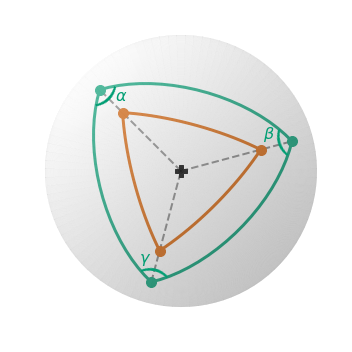

In [8]:
rcParams['figure.figsize'] = 5, 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r = 1 # unit-ball

# Spherical cap
theta_cap = 0.05223717

r = 1

u_cap = np.linspace(0, 2 * np.pi, 100)
v_cap = np.linspace(0, theta_cap, 200)

x_cap = r * np.outer(np.cos(u_cap), np.sin(v_cap))
y_cap = r * np.outer(np.sin(u_cap), np.sin(v_cap))
z_cap = r * np.outer(np.ones(np.size(u_cap)), np.cos(v_cap))

# Unit ball
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 200)

x = r * np.outer(np.cos(u), np.sin(v))
y = r * np.outer(np.sin(u), np.sin(v))
z = r * np.outer(np.ones(np.size(u)), np.cos(v))

# Vertices
V0 = [1,0,0]
V1 = [0,1,0]
V2 = [0,0,1]


# Incenter
In = [0.5773503, 0.5773503, 0.5773503]

# Rotation
axis = cross(In, [0,0,1])
theta = np.arccos(In[2]) 

V0_rot = np.dot(rotation_matrix(axis, theta), V0)
V1_rot = np.dot(rotation_matrix(axis, theta), V1)
V2_rot = np.dot(rotation_matrix(axis, theta), V2)

M0_rot = np.dot(rotation_matrix(axis, theta), [1/sqrt(2),1/sqrt(2),0])
M1_rot = np.dot(rotation_matrix(axis, theta), [1/sqrt(2),0,1/sqrt(2)])
M2_rot = np.dot(rotation_matrix(axis, theta), [0,1/sqrt(2),1/sqrt(2)])

M0_rot = np.dot(rotation_matrix(V2, -pi/3), M0_rot)
M1_rot = np.dot(rotation_matrix(V2, -pi/3), M1_rot)
M2_rot = np.dot(rotation_matrix(V2, -pi/3), M2_rot)

In_rot = np.dot(rotation_matrix(axis, theta), In)

# Limits
[FD_lim2_x, FD_lim2_y, FD_lim2_z] = Geometric_Slerp(V0_rot, V1_rot, r, 20)
[FD_lim1_x, FD_lim1_y, FD_lim1_z] = Geometric_Slerp(V0_rot, V2_rot, r, 20)
[FD_lim0_x, FD_lim0_y, FD_lim0_z] = Geometric_Slerp(V2_rot, V1_rot, r, 20)

[FD2_lim2_x, FD2_lim2_y, FD2_lim2_z] = Geometric_Slerp(M0_rot, M1_rot, r, 20)
[FD2_lim1_x, FD2_lim1_y, FD2_lim1_z] = Geometric_Slerp(M0_rot, M2_rot, r, 20)
[FD2_lim0_x, FD2_lim0_y, FD2_lim0_z] = Geometric_Slerp(M2_rot, M1_rot, r, 20)


[FD3_lim2_x, FD3_lim2_y, FD3_lim2_z] = Geometric_Slerp(V0_rot, In_rot, r, 20)
[FD3_lim1_x, FD3_lim1_y, FD3_lim1_z] = Geometric_Slerp(In_rot, V2_rot, r, 20)
[FD3_lim0_x, FD3_lim0_y, FD3_lim0_z] = Geometric_Slerp(In_rot, V1_rot, r, 20)

# Plot spherical cap and unit-ball
#ax.plot_surface(x_cap, y_cap, z_cap, linewidth=0, rstride=1, cstride=1, color='b', alpha = .5)
ax.plot_surface(x, y, z, linewidth=0, rstride=1, cstride=1, color='w', alpha = .2)


# plot theta
normal_vector = cross(In_rot,V1_rot)

x, y, z =  fsolve(equations, (1, 0, 0))

[theta_x, theta_y, theta_z] = Geometric_Slerp(In_rot, [x,y,z], r, 10)
#ax.plot(theta_x, theta_y, theta_z,'--', color='r')


# Plot FD limits

ax.plot(FD3_lim2_x, FD3_lim2_y, FD3_lim2_z, '--', color='grey', linewidth = 2, alpha = 1)
ax.plot(FD3_lim1_x, FD3_lim1_y, FD3_lim1_z, '--', color='grey', linewidth = 2, alpha = 1)
ax.plot(FD3_lim0_x, FD3_lim0_y, FD3_lim0_z, '--', color='grey', linewidth = 2, alpha = 1)

ax.plot(FD_lim2_x, FD_lim2_y, FD_lim2_z, color='#009E73', linewidth = 3, alpha = 1)
ax.plot(FD_lim1_x, FD_lim1_y, FD_lim1_z, color='#009E73', linewidth = 3, alpha = 1)
ax.plot(FD_lim0_x, FD_lim0_y, FD_lim0_z, color='#009E73', linewidth = 3, alpha = 1)

ax.plot(FD2_lim2_x, FD2_lim2_y, FD2_lim2_z, color='#D55E00', linewidth = 3, alpha = 1)
ax.plot(FD2_lim1_x, FD2_lim1_y, FD2_lim1_z, color='#D55E00', linewidth = 3, alpha = 1)
ax.plot(FD2_lim0_x, FD2_lim0_y, FD2_lim0_z, color='#D55E00', linewidth = 3, alpha = 1)

# Plot vertices & incenter
ax.plot([V0_rot[0]],[V0_rot[1]],[V0_rot[2]], c="#009E73", marker='o', markersize = 10)
ax.plot([V1_rot[0]],[V1_rot[1]],[V1_rot[2]], c="#009E73", marker='o', markersize = 10)
ax.plot([V2_rot[0]],[V2_rot[1]],[V2_rot[2]], c="#009E73", marker='o', markersize = 10)

ax.plot([M0_rot[0]],[M0_rot[1]],[M0_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([M1_rot[0]],[M1_rot[1]],[M1_rot[2]], c="#D55E00", marker='o', markersize = 10)
ax.plot([M2_rot[0]],[M2_rot[1]],[M2_rot[2]], c="#D55E00", marker='o', markersize = 10)

ax.plot([In_rot[0]],[In_rot[1]],[In_rot[2]], color="k", marker='P', markersize = 12 )


ax.text2D(0.32,0.724, r"$\alpha$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.755,0.61, r"$\beta$",style='italic', color="#009E73", size=16, transform=ax.transAxes)
ax.text2D(0.39, 0.245, r"$\gamma$",style='italic', color="#009E73", size=16, transform=ax.transAxes)

ax.text2D(0.245,0.704, ")",color="#009E73", size=30, rotation=-46, transform=ax.transAxes)
ax.text2D(0.78,0.57, "(",color="#009E73", size=30, rotation=18, transform=ax.transAxes)
ax.text2D(0.39, 0.215, ")", color="#009E73", size=30, rotation=76, transform=ax.transAxes)

ax.view_init(elev=90, azim=0)
ax.dist=7
ax.set_axis_off()
plt.tight_layout()
fig.savefig('../Images/figS3a.PNG', format='PNG', dpi=300)
#plt.savefig('aniso_example_paper.eps', format='eps')
plt.show()